In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob 



import CASBI.preprocessing as preprocessing

/opt/anaconda/conda/envs/torch/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# CREATION OF THE Files from the simulations

# sim_path = glob.glob('/mnt/storage/_data/nihao/nihao_classic/g?.??e??/g?.??e??.0????')
# file_path = '../../data/casbi_rewriting/new_files'
# preprocessing.gen_files(sim_path=sim_path, file_path=file_path)

Halo error g1.77e12.00016
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not formed stars yet
Not form

In [5]:
# CREATION OF PREPROCESSING FILE AND DATAFRAME

file_dir = '../../data/casbi_rewriting/new_files'
preprocessing_dir = '../../data/casbi_rewriting/'

preprocess_file_path = preprocessing.preprocess(file_dir=file_dir, preprocess_dir=preprocessing_dir)
print(preprocess_file_path)

100%|██████████| 7248/7248 [02:13<00:00, 54.25it/s] 


../../data/casbi_rewriting/preprocess_file.npz


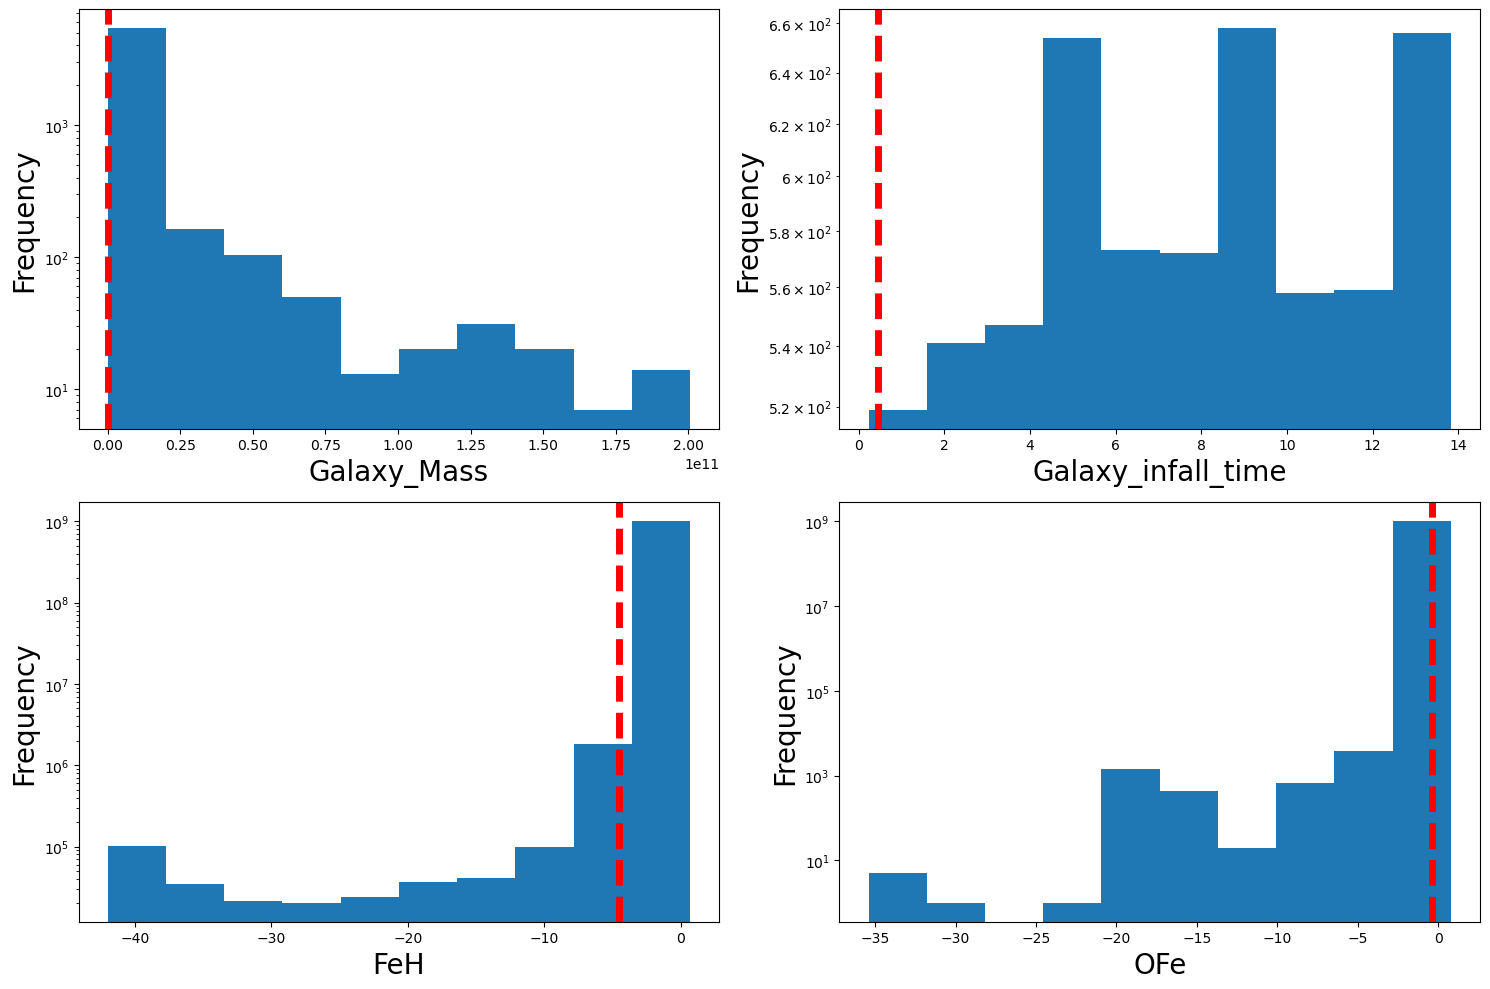

In [6]:
# Load the .npz file
preprocessing_file = np.load(preprocess_file_path, allow_pickle=True)

# Get the keys from the .npz file
keys = preprocessing_file.files

# Determine the number of rows and columns for the subplots
n_keys = len(keys)
n_cols = 2
n_rows = (n_keys + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histogram and vertical line for each key
for i, key in enumerate(keys):
    data = preprocessing_file[key]
    axes[i].hist(data)
    axes[i].set_yscale('log')
    percentile_01 = np.percentile(data, 0.1)
    axes[i].axvline(percentile_01, color='r', linestyle='dashed', linewidth=5)
    axes[i].set_xlabel(key, fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [2]:
file_dir = '../../data/casbi_rewriting/new_files'
preprocessing_dir = '../../data/casbi_rewriting/'

df = preprocessing.gen_dataframe(file_dir=file_dir, dataframe_path = preprocessing_dir)
df.head()

,star_mass,infall_time,Galaxy_name,max_feh,max_ofe
0,1.420102e+05,0.448779,g1.05e11.00032,-2.981872,0.755956
1,1.061463e+06,0.664548,g1.05e11.00048,-2.123312,0.755956
2,2.240866e+06,0.880318,g1.05e11.00064,-2.063627,0.756730
3,4.397970e+06,1.096087,g1.05e11.00080,-1.814505,0.756730
4,6.164643e+06,1.311857,g1.05e11.00096,-1.916148,0.756730


In [18]:
import os
import pandas as pd
file_path=os.path.join(file_dir, os.listdir(file_dir)[1])

In [19]:
properties = ['star_mass', 'infall_time', 'Galaxy_name', 'feh', 'ofe']
data = [np.load(file_path)[prop].item() for prop in properties[:3]]
#get the maximum of feh and ofe
data.append([np.load(file_path)[prop].max() for prop in properties[3:]])
properties[2:] = ['max_feh', 'max_ofe']
df_temp = pd.DataFrame(columns = properties)
df_temp.loc[0] = data


In [11]:
properties[3:]

['feh', 'ofe']